In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

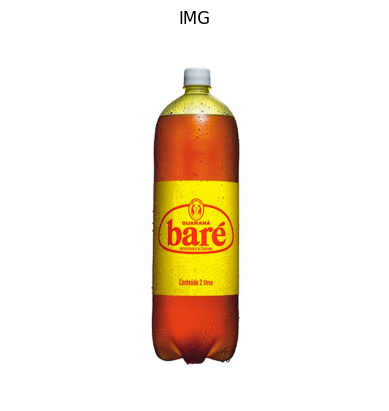

In [2]:
img = cv2.imread(r"C:\Users\Inovacao\Documents\github\opencv-experiments\imgs\produtos\bare.jpeg")

# Convertendo de BGR para RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("IMG")
plt.axis('off')
plt.show()

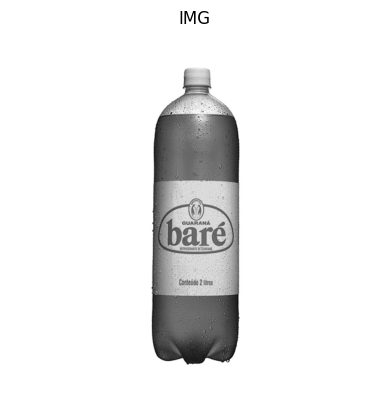

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("IMG")
plt.axis('off')
plt.show()

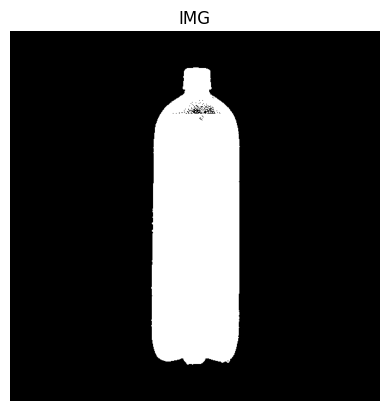

In [4]:
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV) # Tornando a imagem binária
plt.imshow(thresh, cmap='gray')
plt.title("IMG")
plt.axis('off')
plt.show()

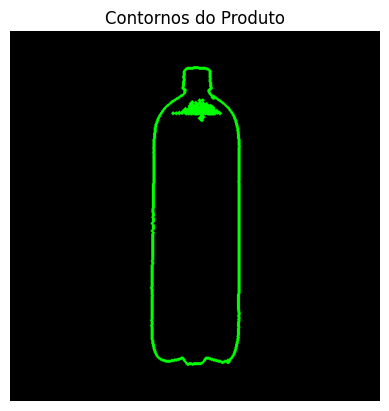

In [5]:
# Encontrar contorno do produto
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Criando uma cópia da imagem para desenhar os contornos
contour_img = np.zeros_like(img)

# Desenhando os contornos na imagem
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)

# Convertendo a imagem com contornos de BGR para RGB para exibição com Matplotlib
contour_img_rgb = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)

# Exibindo a imagem com Matplotlib
plt.imshow(contour_img_rgb)
plt.title("Contornos do Produto")
plt.axis('off')
plt.show()

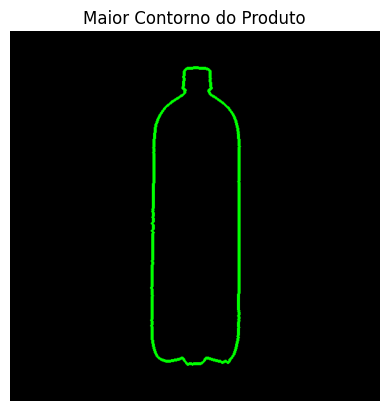

In [6]:
# Encontrando o maior contorno
largest_contour = max(contours, key=cv2.contourArea)

# Criando uma imagem em branco com as mesmas dimensões da imagem original
contour_img = np.zeros_like(img)

# Desenhando apenas o maior contorno na imagem em branco
cv2.drawContours(contour_img, [largest_contour], -1, (0, 255, 0), 3)

# Convertendo de BGR para RGB para exibição correta com Matplotlib
contour_img_rgb = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)

# Exibindo a imagem com o maior contorno
plt.imshow(contour_img_rgb)
plt.title("Maior Contorno do Produto")
plt.axis('off') # Esconde os eixos
plt.show()